In [1]:
%matplotlib notebook
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, normalize
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 10]

2.1.0


In [2]:
import scipy.stats as stats

In [3]:
Fs = 5
frame_size = Fs*4
hop_size = Fs*4

In [4]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 6

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        x = df['acc_x'].values[i: i + frame_size]
        y = df['acc_y'].values[i: i + frame_size]
        z = df['acc_z'].values[i: i + frame_size]
        gx = df['gyro_x'].values[i: i + frame_size]
        gy = df['gyro_y'].values[i: i + frame_size]
        gz = df['gyro_z'].values[i: i + frame_size]
        # Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([x, y, z,gx,gy,gz])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

In [5]:
model = tf.keras.models.load_model('model21april2020_fs05.h5') #05,10,15,20,27,32,38,40

In [6]:
columns = ["Time","acc_x", "acc_y", "acc_z","gyro_x", "gyro_y", "gyro_z", "activity"]
columns2 = ["acc_x", "acc_y", "acc_z","gyro_x", "gyro_y", "gyro_z", "label"]
# nieuw = pd.read_csv("Proefpersoon/Clear/6011853_0000000002.csv", names=columns, sep=',')
# nieuw = pd.read_csv("Proefpersoon/Dab/6011853_0000000000.csv", names=columns, sep=',')
# nieuw = pd.read_csv("Proefpersoon/Drive/6011853_0000000000.csv", names=columns, sep=',')
# nieuw = pd.read_csv("Proefpersoon/Korte Service/6011853_0000000000.csv", names=columns, sep=',')
# nieuw = pd.read_csv("Proefpersoon/Lob/6011853_0000000004.csv", names=columns, sep=',')
# nieuw = pd.read_csv("Proefpersoon/Netdrop/6011853_0000000000.csv", names=columns, sep=',')
# nieuw = pd.read_csv("Proefpersoon/Smash/6011853_0000000000.csv", names=columns, sep=',')
nieuw = pd.read_csv("Proefpersoon/Scenario/Scenario1.csv", names=columns, sep=',')
nieuw["Time"]  = pd.to_datetime(nieuw["Time"])
# nieuw['label']= 4
nieuw.loc[(nieuw['Time'] >= pd.to_datetime("2020-04-21 18:34:30.0")) & (nieuw['Time'] <= pd.to_datetime("2020-04-21 18:35:24.0")), 'label'] = 0
nieuw.loc[(nieuw['Time'] >= pd.to_datetime("2020-04-06 15:30:41.0")) & (nieuw['Time'] <= pd.to_datetime("2020-04-06 15:31:14.0")), 'label'] = 1
nieuw.loc[(nieuw['Time'] >= pd.to_datetime("2020-04-21 18:31:27.0")) & (nieuw['Time'] <= pd.to_datetime("2020-04-21 18:32:04.1")), 'label'] = 2
nieuw.loc[(nieuw['Time'] >= pd.to_datetime("2020-04-06 15:54:57.0")) & (nieuw['Time'] <= pd.to_datetime("2020-04-06 15:55:22.0")), 'label'] = 3
nieuw.loc[(nieuw['Time'] >= pd.to_datetime("2020-04-23 18:30:22.0")) & (nieuw['Time'] <= pd.to_datetime("2020-04-23 18:31:08.0")), 'label'] = 4
nieuw.loc[(nieuw['Time'] >= pd.to_datetime("2020-04-08 17:53:45.0")) & (nieuw['Time'] <= pd.to_datetime("2020-04-08 17:54:46.0")), 'label'] = 5
nieuw.loc[(nieuw['Time'] >= pd.to_datetime("2020-04-08 17:56:26.0")) & (nieuw['Time'] <= pd.to_datetime("2020-04-08 17:56:58.0")), 'label'] = 6

nieuw.head()

,Time,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,activity,label
0,2020-04-21 18:34:30.000,-0.921875,0.892578,0.378906,-75.256348,-159.545898,-233.703598,NaN,0.0
1,2020-04-21 18:34:30.010,-0.873535,0.928711,0.356445,-61.889645,-175.598129,-256.347656,NaN,0.0
2,2020-04-21 18:34:30.020,-0.903320,1.003418,0.341309,-47.119137,-191.284164,-264.221191,NaN,0.0
3,2020-04-21 18:34:30.030,-0.937988,1.062500,0.325195,-32.348633,-207.214340,-256.530762,NaN,0.0
4,2020-04-21 18:34:30.040,-0.999512,1.096680,0.296387,-17.639160,-222.778305,-238.769516,NaN,0.0


In [7]:
X2 = nieuw[['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z']]
y2 = nieuw['label']

In [8]:
scaled_X = pd.DataFrame(data = X2, columns = ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z'])
scaled_X['label'] = y2.values
scaled_X['acc_x'] *=125
scaled_X['acc_y'] *=125
scaled_X['acc_z'] *=125

In [9]:
Xnorm = pd.DataFrame(data = scaled_X, columns = ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z'])
ynorm = scaled_X['label']
#Xnorm = normalize(Xnorm)
Xnorm = pd.DataFrame(Xnorm, columns = ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z'])
Xnorm['label'] = ynorm.values
Xnorm.head()

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,label
0,-115.234375,111.572250,47.363250,-75.256348,-159.545898,-233.703598,0.0
1,-109.191875,116.088875,44.555625,-61.889645,-175.598129,-256.347656,0.0
2,-112.915000,125.427250,42.663625,-47.119137,-191.284164,-264.221191,0.0
3,-117.248500,132.812500,40.649375,-32.348633,-207.214340,-256.530762,0.0
4,-124.939000,137.085000,37.048375,-17.639160,-222.778305,-238.769516,0.0


In [10]:
X_2, y_2 = get_frames(Xnorm, frame_size, int(hop_size/1))

In [11]:
X_2 = X_2.reshape( X_2.shape[0], X_2.shape[1], X_2.shape[2], 1)

In [12]:
import sys
np.set_printoptions(threshold=sys.maxsize)
y_pred2 = model.predict_classes(X_2)
y_pred2

array([1, 4, 3, 4, 4, 2, 0, 5, 1, 1, 4, 5, 4, 0, 1, 1, 5, 1, 4, 5, 4, 4,
       2, 0, 5, 2, 4, 4, 4, 4, 0, 1, 0, 5, 2, 4, 0, 4, 4, 0, 0, 5, 2, 3,
       0, 0, 4, 2, 3, 0, 2, 3, 4, 0, 4, 2, 2, 0, 5, 2, 4, 0, 0, 4, 0, 2,
       5, 2, 3, 6, 0, 4, 2, 0, 0, 2, 1, 4, 5, 0, 4, 0, 0, 0, 5, 3, 4, 0,
       4, 4, 0, 0, 0, 3, 4, 0, 0, 4, 0, 0, 0, 2, 4, 4, 0, 4, 2, 0, 0, 2,
       2, 4, 0, 4, 2, 0, 0, 0, 2, 2, 5, 0, 4, 0, 0, 0, 2, 4, 0, 4, 4, 0,
       1, 5, 5, 4, 5, 0, 4, 2, 1, 5, 5, 4, 0, 0, 4, 2, 2, 1, 2, 2, 5, 0,
       4, 2, 0, 1, 1, 2, 2, 0, 0, 2, 0, 0, 1, 2, 4, 5, 0, 4, 2, 0, 0, 2,
       4, 6, 0, 4, 2, 2, 0, 2, 4, 6, 0, 4, 2, 0, 0, 5, 4, 0, 0, 4, 0, 2,
       0, 2, 4, 0, 0, 4, 4, 2, 5, 8, 2, 4, 0, 0, 2, 2, 0, 2, 4, 4, 0, 0,
       4, 2, 0, 2, 2, 2, 5, 4, 2, 0, 0, 5, 4, 2, 0, 4, 2, 0, 0, 2, 2, 2,
       5, 0, 4, 2, 0, 2, 4, 5, 0, 4, 2, 0, 0, 2, 4, 5, 0, 4, 0, 0, 5, 3,
       0, 0, 4, 4, 0, 0, 2, 7, 1, 1, 1, 1, 1, 7, 4, 0, 1, 1, 1, 4, 7, 4,
       1, 1, 1, 1, 7, 4, 1, 1, 1, 1, 7, 1, 1, 1, 1,

C:\Users\annic\Anaconda3\lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:66: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


<IPython.core.display.Javascript object>


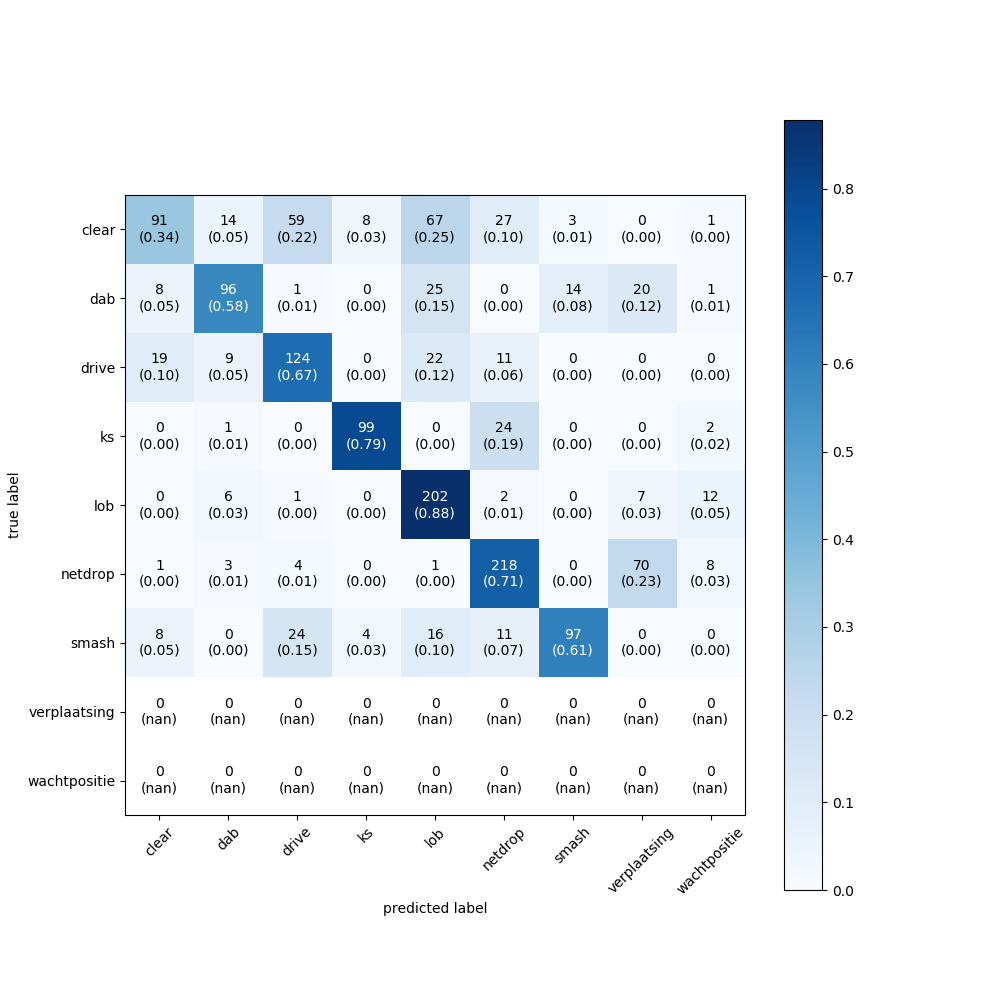

In [13]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
mat = confusion_matrix(y_2, y_pred2)
class_names = ['clear', 'dab', 'drive', 'ks', 'lob', 'netdrop', 'smash', 'verplaatsing', 'wachtpositie']

fig, ax = plot_confusion_matrix(conf_mat=mat,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                class_names=class_names[:len(np.unique(y_pred2))])
plt.show()

In [14]:
z2 = model.predict(X_2)
used_prob = np.array([])
correct = np.array([])
for i in range(0,y_pred2.shape[0]):
    used_prob = np.append(used_prob, z2[i][y_pred2[i]])
    if y_pred2[i] == y_2[i]:
        correct = np.append(correct, " ")
    else:
        correct = np.append(correct, "--- FOUT")

vergelijk = pd.DataFrame(used_prob, y_pred2)
vergelijk["correct"] = correct
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(vergelijk)

          0   correct
1  0.627522  --- FOUT
4  0.931952  --- FOUT
3  0.625241  --- FOUT
4  0.955350  --- FOUT
4  0.825951  --- FOUT
2  0.781049  --- FOUT
0  0.924576          
5  0.549605  --- FOUT
1  0.506785  --- FOUT
1  0.783695  --- FOUT
4  0.898287  --- FOUT
5  0.778106  --- FOUT
4  0.997333  --- FOUT
0  0.906301          
1  0.924622  --- FOUT
1  0.632414  --- FOUT
5  0.961362  --- FOUT
1  0.639625  --- FOUT
4  0.607068  --- FOUT
5  0.519393  --- FOUT
4  0.965780  --- FOUT
4  0.693698  --- FOUT
2  0.524146  --- FOUT
0  0.964232          
5  0.848910  --- FOUT
2  0.491343  --- FOUT
4  0.974716  --- FOUT
4  0.689496  --- FOUT
4  0.658488  --- FOUT
4  0.999022  --- FOUT
0  0.871850          
1  0.617753  --- FOUT
0  0.608250          
5  0.554561  --- FOUT
2  0.878338  --- FOUT
4  0.459937  --- FOUT
0  0.857015          
4  0.961419  --- FOUT
4  0.816424  --- FOUT
0  0.735685          
0  0.978573          
5  0.819342  --- FOUT
2  0.591199  --- FOUT
3  0.959679  --- FOUT
0  0.60557

# Ensemble learning

In [15]:
# models = list()

# model10 = tf.keras.models.load_model('model21april2020_fs10.h5')
# model20 = tf.keras.models.load_model('model21april2020_fs20.h5')
# model40 = tf.keras.models.load_model('model21april2020_fs40.h5')

model10 = tf.keras.models.load_model('model21april2020_fs10.h5')
model15 = tf.keras.models.load_model('model21april2020_fs15.h5')
model20 = tf.keras.models.load_model('model21april2020_fs20.h5')
model25 = tf.keras.models.load_model('model21april2020_fs25.h5')
model30 = tf.keras.models.load_model('model21april2020_fs30.h5')
model35 = tf.keras.models.load_model('model21april2020_fs35.h5')
model40 = tf.keras.models.load_model('model21april2020_fs40.h5')

In [16]:
X_2_10, y_2_10 = get_frames(Xnorm, 40, int(40/1))
X_2_10 = X_2_10.reshape( X_2_10.shape[0], X_2_10.shape[1], X_2_10.shape[2], 1)

X_2_15, y_2_15 = get_frames(Xnorm, 60, int(60/1))
X_2_15 = X_2_15.reshape( X_2_15.shape[0], X_2_15.shape[1], X_2_15.shape[2], 1)

X_2_20, y_2_20 = get_frames(Xnorm, 80, int(80/1))
X_2_20 = X_2_20.reshape( X_2_20.shape[0], X_2_20.shape[1], X_2_20.shape[2], 1)

X_2_25, y_2_25 = get_frames(Xnorm, 100, int(100/1))
X_2_25 = X_2_25.reshape( X_2_25.shape[0], X_2_25.shape[1], X_2_25.shape[2], 1)

X_2_30, y_2_30 = get_frames(Xnorm, 120, int(120/1))
X_2_30 = X_2_30.reshape( X_2_30.shape[0], X_2_30.shape[1], X_2_30.shape[2], 1)

X_2_35, y_2_35 = get_frames(Xnorm, 140, int(140/1))
X_2_35 = X_2_35.reshape( X_2_35.shape[0], X_2_35.shape[1], X_2_35.shape[2], 1)

X_2_40, y_2_40 = get_frames(Xnorm, 160, int(160/1))
X_2_40 = X_2_40.reshape( X_2_40.shape[0], X_2_40.shape[1], X_2_40.shape[2], 1)

In [17]:
yp_10 = model10.predict(X_2_10)
yp_15 = model15.predict(X_2_15)
yp_20 = model20.predict(X_2_20)
yp_25 = model25.predict(X_2_25)
yp_30 = model30.predict(X_2_30)
yp_35 = model35.predict(X_2_35)
yp_40 = model40.predict(X_2_40)

In [18]:
# print(yp_20)

In [19]:
# yp_20 = np.repeat(a = yp_20, repeats = 2, axis = 0)
# yp_40 = np.repeat(a = yp_40, repeats = 4, axis = 0)

yp_10 = np.repeat(a = yp_10, repeats = 2, axis = 0)
yp_15 = np.repeat(a = yp_15, repeats = 3, axis = 0)
yp_20 = np.repeat(a = yp_20, repeats = 4, axis = 0)
yp_25 = np.repeat(a = yp_25, repeats = 5, axis = 0)
yp_30 = np.repeat(a = yp_30, repeats = 6, axis = 0)
yp_35 = np.repeat(a = yp_35, repeats = 7, axis = 0)
yp_40 = np.repeat(a = yp_40, repeats = 8, axis = 0)

## Gewichten toekennen

In [20]:
for i in range(0, len(yp_10)):
    yp_10[i][3] = yp_10[i][3]*2
for i in range(0, len(yp_15)):
    yp_15[i][3] = yp_15[i][3]*2
for i in range(0, len(yp_20)):
    yp_20[i][3] = yp_20[i][3]*2
    
for i in range(0, len(yp_30)):
    yp_30[i][0] = yp_30[i][0]*2
for i in range(0, len(yp_35)):
    yp_35[i][0] = yp_35[i][0]*2
for i in range(0, len(yp_40)):
    yp_40[i][0] = yp_40[i][0]*2

## Gecombineerde voorspelling

In [22]:
# min_ = min(len(yp_10),len(yp_20),len(yp_40))
min_ = min(len(yp_10),len(yp_15),len(yp_20),len(yp_25),len(yp_30),len(yp_35),len(yp_40))
print(min_)

# yhats = [yp_10[:min_], yp_20[:min_], yp_40[:min_]]
yhats = [yp_10[:min_], yp_15[:min_], yp_20[:min_], yp_25[:min_], yp_30[:min_], yp_35[:min_], yp_40[:min_]]
# sum across ensembles
summed = np.sum(yhats, axis=0)
# argmax across classes
outcomes = np.argmax(summed, axis=1)
print(outcomes)

1435
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2

In [23]:
#len(X_2_38)

In [24]:
len(outcomes)

1435

C:\Users\annic\Anaconda3\lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:66: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


<IPython.core.display.Javascript object>


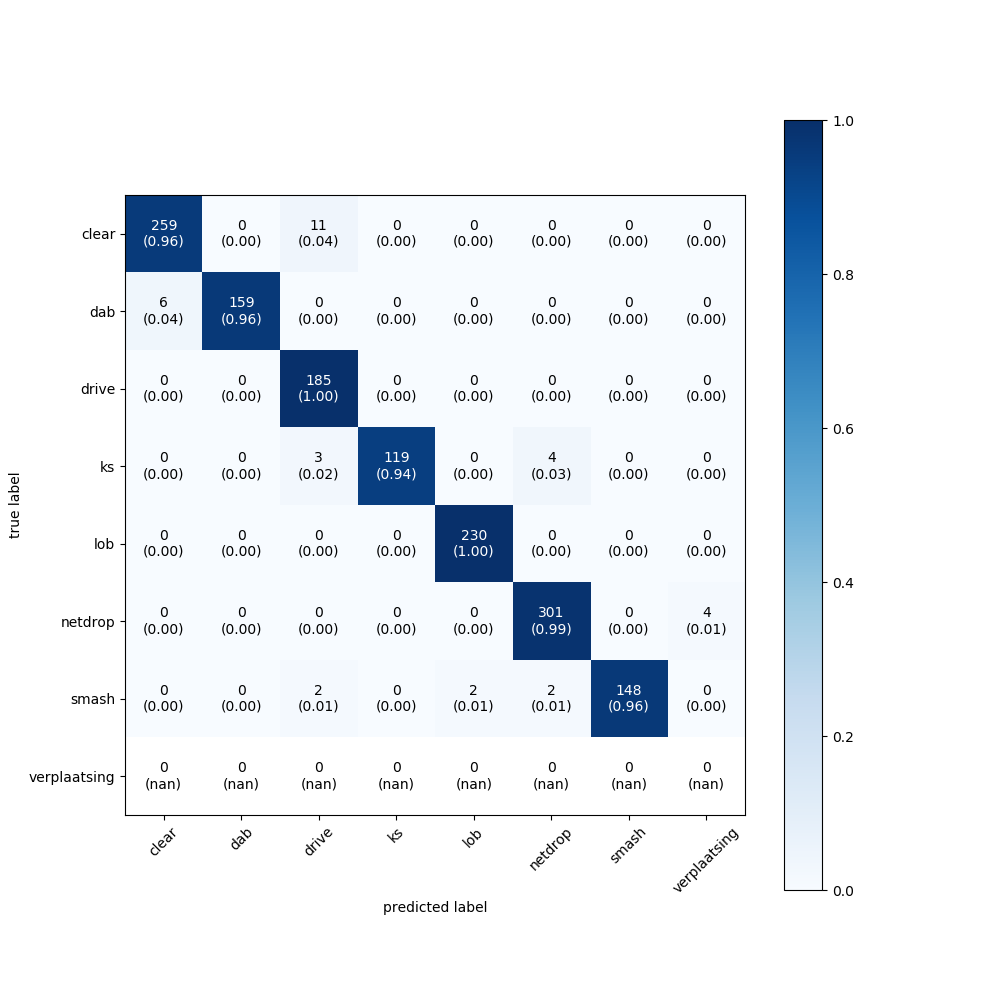

In [25]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
mat = confusion_matrix(y_2[:min_], outcomes)
class_names = ['clear', 'dab', 'drive', 'ks', 'lob', 'netdrop', 'smash', 'verplaatsing']#, 'wachtpositie'

fig, ax = plot_confusion_matrix(conf_mat=mat,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                class_names=class_names[:len(np.unique(y_pred2))])
plt.show()

In [26]:
len(y_2)

1441